In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import stats
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
#Read data from csv into a dataframe
data = pd.read_csv("cpidata_5year.csv", parse_dates = ['date'])
data.tail()


,date,dairycpi,mpfecpi,fandvcpi
55,2024-08-01,269.468,328.340,350.960
56,2024-09-01,269.643,331.004,353.976
57,2024-10-01,271.695,326.927,355.415
58,2024-11-01,270.819,332.468,356.111
59,2024-12-01,271.358,334.525,355.730


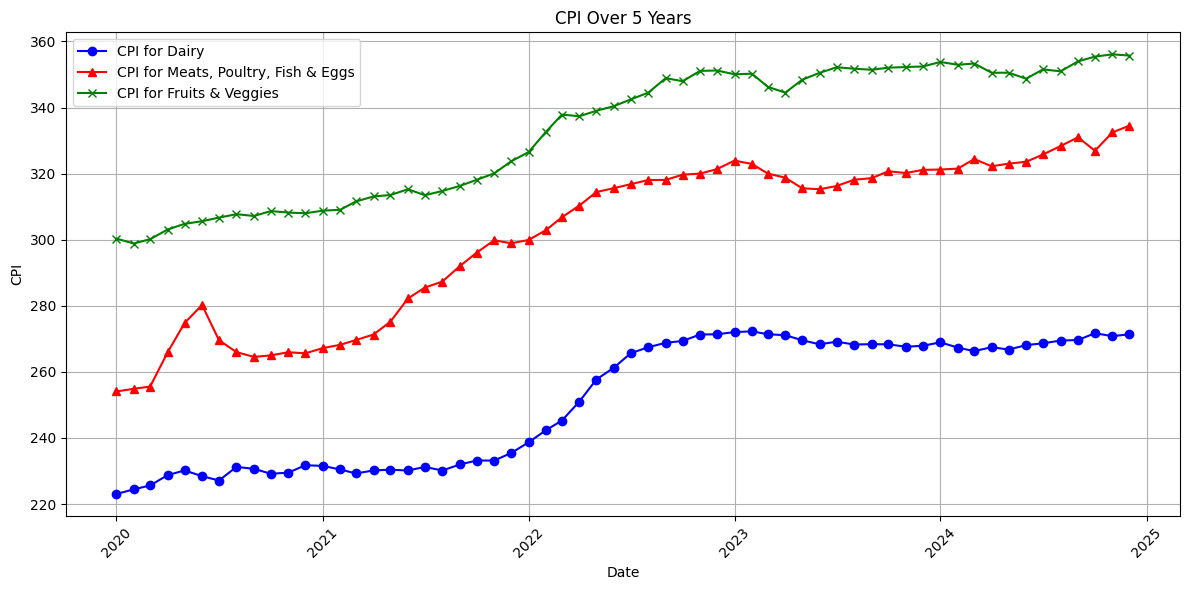

In [3]:

#dairy_df = data[["date", "dairycpi"]]
plt.figure(figsize=(12, 6))

plt.plot(data['date'], data['dairycpi'], label='CPI for Dairy', color='b', linestyle='-', marker='o')
plt.plot(data['date'], data['mpfecpi'], label='CPI for Meats, Poultry, Fish & Eggs', color='r', linestyle='-', marker='^')
plt.plot(data['date'], data['fandvcpi'], label='CPI for Fruits & Veggies', color='g', linestyle='-', marker='x')

plt.title('CPI Over 5 Years')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.grid(True)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.legend()

plt.show()

In [4]:
# Check correlation between each category (Is there a relationship between each category?)
correlation_matrix = data[['dairycpi', 'mpfecpi', 'fandvcpi']].corr()
print(correlation_matrix)

          dairycpi   mpfecpi  fandvcpi
dairycpi  1.000000  0.940457  0.977279
mpfecpi   0.940457  1.000000  0.973690
fandvcpi  0.977279  0.973690  1.000000


Slope: 1.0308941832073333
Intercept: 73.64606969419032
R-squared: 0.9550742924971966
P-value: 8.919666405923078e-41
Standard Error: 0.02935816974999957


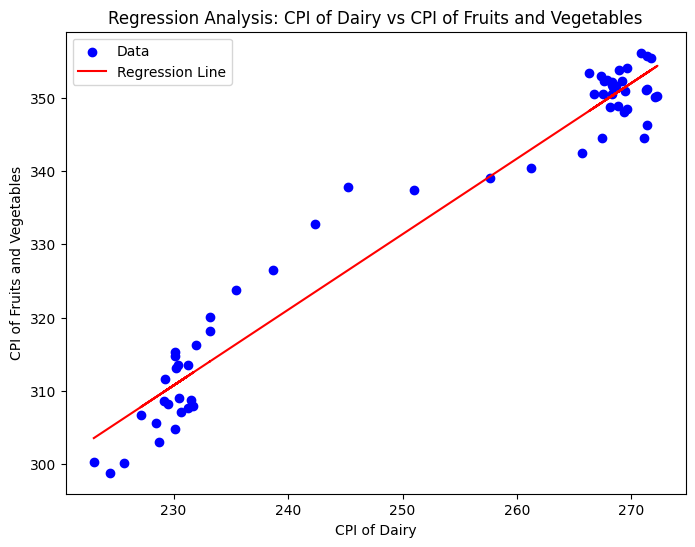

In [5]:
# Extract the relevant columns
x = data['dairycpi']
y = data['fandvcpi']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print out the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
plt.xlabel('CPI of Dairy')
plt.ylabel('CPI of Fruits and Vegetables')
plt.title('Regression Analysis: CPI of Dairy vs CPI of Fruits and Vegetables')
plt.legend()
plt.show()

Slope: 0.721442681457828
Intercept: 33.99813840764597
R-squared: 0.8844585539690936
P-value: 7.302489522619856e-29
Standard Error: 0.03423875713107478


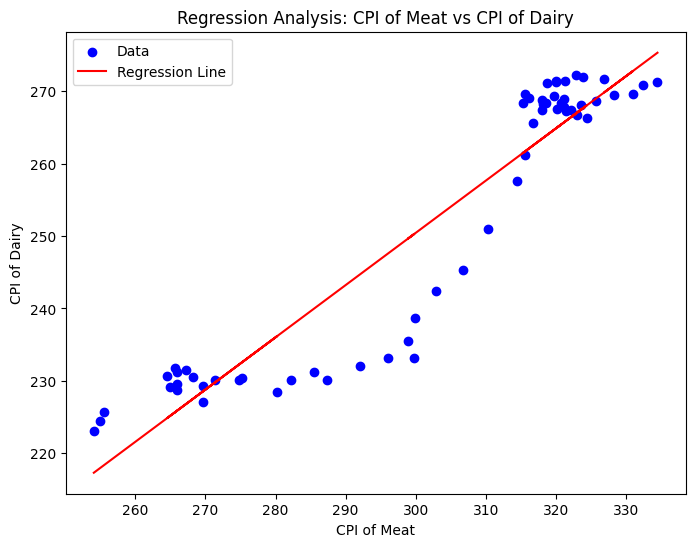

In [5]:
# Extract the relevant columns
x = data['mpfecpi']
y = data['dairycpi']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print out the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
plt.xlabel('CPI of Meat')
plt.ylabel('CPI of Dairy')
plt.title('Regression Analysis: CPI of Meat vs CPI of Dairy')
plt.legend()
plt.show()

In [ ]:
# Extract the relevant columns
x = data['mpfecpi']
y = data['dairycpi']

# Perform linear regression using scipy.stats.linregress
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Print out the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, slope * x + intercept, color='red', label='Regression Line')
plt.xlabel('CPI of Meat')
plt.ylabel('CPI of Dairy')
plt.title('Regression Analysis: CPI of Meat vs CPI of Dairy')
plt.legend()
plt.show()

In [6]:
# ANOVA analysis
# Compare means of the three categories
f_stat, p_value = stats.f_oneway(data['dairycpi'], data['mpfecpi'], data['fandvcpi'])

print('F-statistic:', f_stat)
print('P-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

F-statistic: 220.77647139472967
P-value: 8.105511419835499e-49
There is a significant difference between the categories.


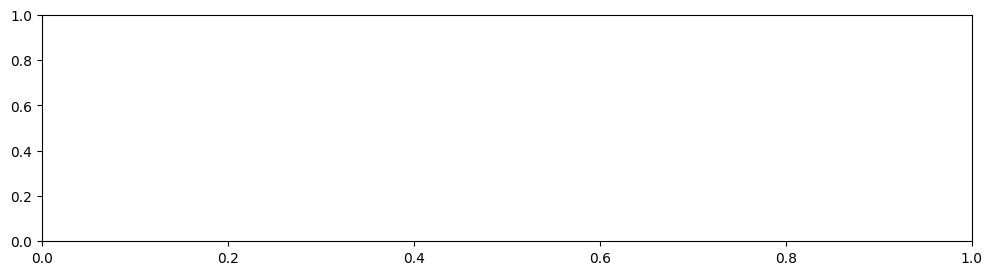

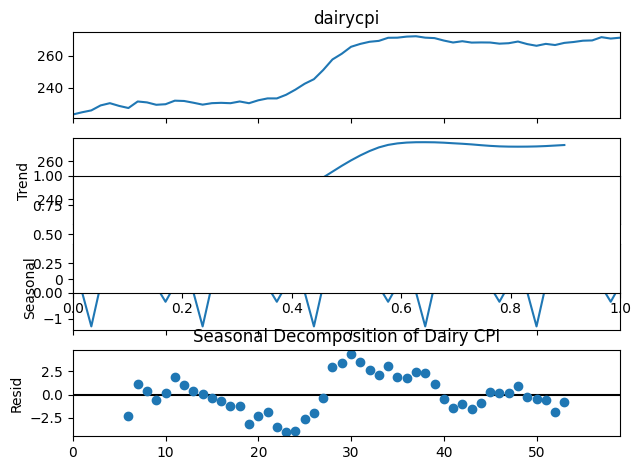

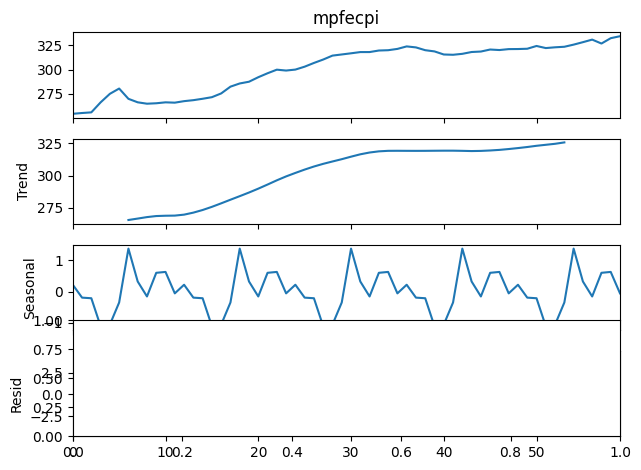

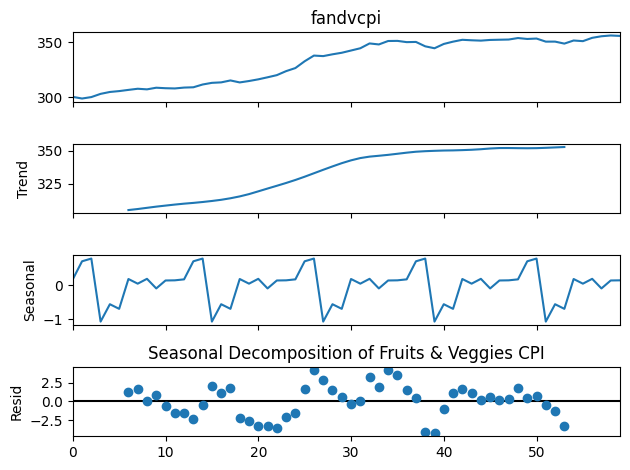

In [7]:
# Decompose the time series for each category
dairy_decomposition = seasonal_decompose(data['dairycpi'], model='additive', period=12)
meat_decomposition = seasonal_decompose(data['mpfecpi'], model='additive', period=12)
fruits_veggies_decomposition = seasonal_decompose(data['fandvcpi'], model='additive', period=12)

# Plotting the decompositions
plt.figure(figsize=(12, 10))

# Dairy
plt.subplot(3, 1, 1)
dairy_decomposition.plot()
plt.title('Seasonal Decomposition of Dairy CPI')

# Meat
plt.subplot(3, 1, 2)
meat_decomposition.plot()
plt.title('Seasonal Decomposition of Meat CPI')

# Fruits and Veggies
plt.subplot(3, 1, 3)
fruits_veggies_decomposition.plot()
plt.title('Seasonal Decomposition of Fruits & Veggies CPI')

plt.savefig("seasonal_trends.png")

plt.tight_layout()
plt.show()



dairycpi    float64
mpfecpi     float64
fandvcpi    float64
dtype: object


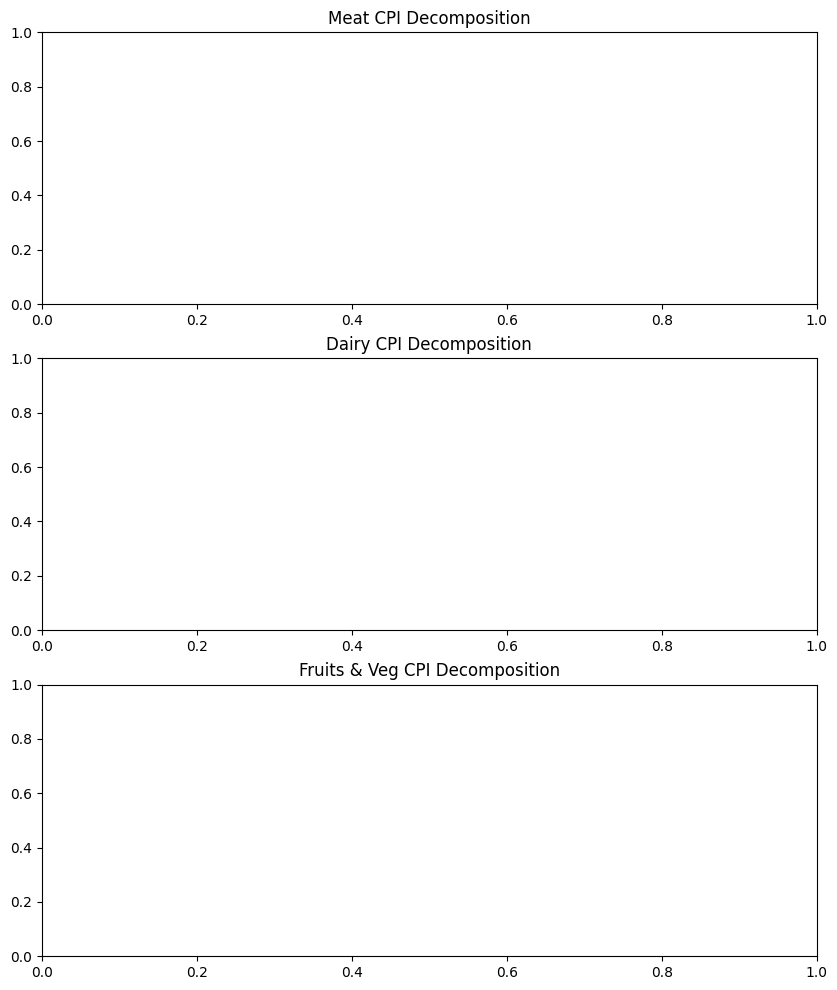

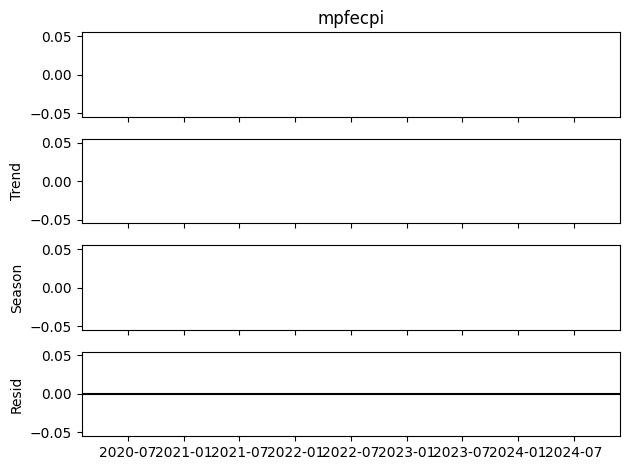

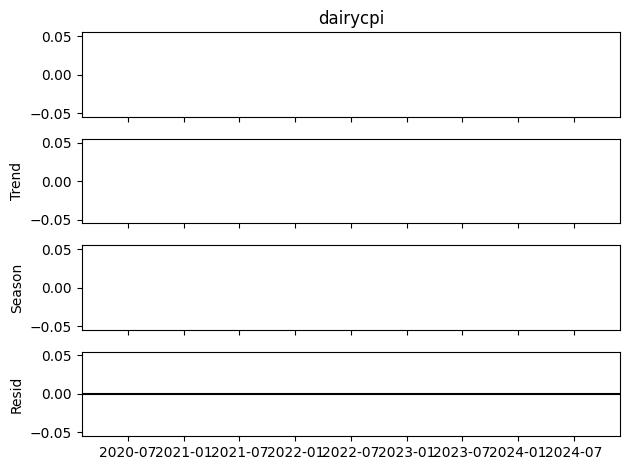

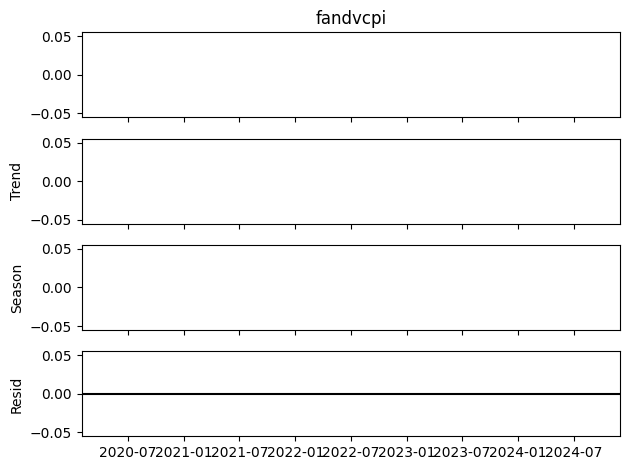

In [5]:

# Ensure the index is a datetime type and has the correct frequency
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data = data.asfreq('ME')  # Ensures monthly frequency (or adjust if needed)

print(data.dtypes)
data['mpfecpi'] = pd.to_numeric(data['mpfecpi'], errors='coerce')
data['dairycpi'] = pd.to_numeric(data['dairycpi'], errors='coerce')
data['fandvcpi'] = pd.to_numeric(data['fandvcpi'], errors='coerce')

# Decompose Meat CPI data
stl_mpfe = STL(data['mpfecpi'], seasonal=13)
result = stl_mpfe.fit()

# Decompose Dairy CPI data
stl_dairy = STL(data['dairycpi'], seasonal=13)
result_dairy = stl_dairy.fit()

# Decompose Fruits & Veg CPI data
stl_fruits = STL(data['fandvcpi'], seasonal=13)
result_fruits = stl_fruits.fit()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Plot Meat decomposition
result.plot()
axes[0].set_title('Meat CPI Decomposition')

# Plot Dairy decomposition
result_dairy.plot()
axes[1].set_title('Dairy CPI Decomposition')

# Plot Fruits & Veg decomposition
result_fruits.plot()
axes[2].set_title('Fruits & Veg CPI Decomposition')

# Adjust layout
plt.tight_layout()
plt.show()